# 数据集的处理

In [3]:
#conding=utf8  
import os 
import numpy as np
import pandas as pd 
# 读取数据集
genetypes = np.loadtxt("/Users/lyjps/Desktop/ALL_CHALLENGE_DATA_15_07_22_11_50_09/CHALLENGE_DATA/genotypes.txt",
                       dtype=int, usecols=np.arange(4,3004),unpack=True)
#print(genetypes)

# 读取标签
list = np.loadtxt("/Users/lyjps/Desktop/ALL_CHALLENGE_DATA_15_07_22_11_50_09/CHALLENGE_DATA/genotype_sample_ids.list",
                          dtype=np.str_, encoding='utf-8')
print(list)

phenotypes = np.zeros(shape=(5,3000))
i =0
for path,dir_list,file_list in os.walk("/Users/lyjps/Desktop/ALL_CHALLENGE_DATA_15_07_22_11_50_09/CHALLENGE_DATA/phenotypes"):  
    for file_name in file_list:  
        #print(os.path.join(path, file_name) )
        phenotypes_i = np.loadtxt(os.path.join(path, file_name),
                                  dtype=np.str_, encoding='utf-8', usecols=(0,))
        s = pd.Series(np.loadtxt(os.path.join(path, file_name),
                                  dtype=float, usecols=(1,)),
                                  phenotypes_i)

        df = pd.DataFrame(s)
        df = df.reset_index()
        df.columns = ['words', 'number']

        df['words'] = df['words'].astype('category')
        # inplace = True，使 recorder_categories生效
        df['words'].cat.reorder_categories(list, inplace=True)
        # inplace = True，使 df生效
        df.sort_values('words', inplace=True)
        #print(df)
        t = df.values
        #a = t[:,1]
        #t[:,1]
        phenotypes[i] = t[:,1]
        i = i+1
        
phenotypes_transpose = np.transpose(phenotypes)
print(phenotypes_transpose)

# 训练集、验证集划分
train_x,test_x=np.split(genetypes,[int(len(genetypes)*0.8),])  #80%训练集、20%测试集
print(len(train_x),len(test_x))
train_y,test_y=np.split(phenotypes_transpose,[int(len(phenotypes_transpose)*0.8)])  #80%训练集、20%测试集
print(len(train_y),len(test_y))





['d8e4f50989cf4f4142627b2e01dde505eafe0cad'
 '4d784bfc402f201b78efb2404ed7c8b9ebf2126a'
 '81b832a049175854a6054c729e403e43bfb11bc6' ...
 'cb2cd678bc0c62f30443514f98bf067e443c929e'
 '76e1d8e319e270e45f1cd0641c8842af6f9dd2b3'
 '4567181cb7d7042447db50be1f48c5c2fbb093ed']
[[ 0.          1.         -0.77562048  0.2772985   0.02397521]
 [ 0.          1.         -0.56495348 -0.05162873 -0.09198061]
 [ 0.          1.         -0.72443017 -0.18412147 -0.05866303]
 ...
 [ 0.          1.          0.40280716 -0.65846191 -0.0763017 ]
 [ 0.          0.         -0.4976993  -0.18874262 -0.15101802]
 [ 0.          0.         -0.6083261  -0.05892341 -0.0601022 ]]
2400 600
2400 600


/var/folders/f0/88_n9dvs6m5b30v0jt7t5j5r0000gn/T/ipykernel_50217/3504189341.py:32: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df['words'].cat.reorder_categories(list, inplace=True)
/var/folders/f0/88_n9dvs6m5b30v0jt7t5j5r0000gn/T/ipykernel_50217/3504189341.py:32: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df['words'].cat.reorder_categories(list, inplace=True)
/var/folders/f0/88_n9dvs6m5b30v0jt7t5j5r0000gn/T/ipykernel_50217/3504189341.py:32: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  df['words'].cat.reorder_categ

# 模型预测

In [11]:
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
#from sklearn.
# 训练
max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(train_x, train_y)


# 预测
y_multirf = regr_multirf.predict(test_x)



/Users/lyjps/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [43]:
import pickle
f = open('/Users/lyjps/Desktop/savemodes/regr_multirf.dat','wb')
pickle.dump(regr_multirf,f)
f.close()

t = open('/Users/lyjps/Desktop/savemodes/regr_multirf.dat','rb')
info = pickle.load(t)
print(info)

print(len(info.estimators_))

print(info.estimators_[0].feature_importances_)

        
info.predict(test_x)
info.get_params(deep=True)
info.score(train_x, train_y, sample_weight=None)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=0))
5
[0.00000000e+00 0.00000000e+00 1.19531660e-04 ... 0.00000000e+00
 3.10924422e-05 0.00000000e+00]


0.9525951388856777

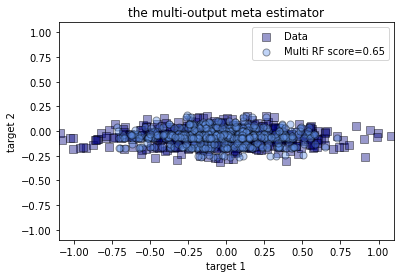

In [30]:
import matplotlib.pyplot as plt
# 正确率可视化
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(
    test_y[:, 2],
    test_y[:, 4],
    edgecolor="k",
    c="navy",
    s=s,
    marker="s",
    alpha=a,
    label="Data",
)
plt.scatter(
    y_multirf[:, 2],
    y_multirf[:, 4],
    edgecolor="k",
    c="cornflowerblue",
    s=s,
    alpha=a,
    label="Multi RF score=%.2f" % regr_multirf.score(test_x, test_y),
)

plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("the multi-output meta estimator")
plt.legend()
plt.show()